In [1]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))
print(tf.__version__)
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os
from sklearn.model_selection import train_test_split
import pandas as pd
# augmentasi gambar
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Menetapkan batas waktu pelatihan
import time
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image  # This should now work without errors.
# from google.colab import drive
# drive.mount('/content/drive')

2024-11-28 15:28:14.171902: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732782494.190125   10610 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732782494.195251   10610 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-28 15:28:14.213461: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.18.0


In [2]:
# Contoh data gambar
base_dir = '/home/irium/htdocs/widiarrohman1234.github.io/Artificial_Intelligence/folder_dataset/animal/animal_dataset'
image_paths = []
labels = []
train_dir = os.path.join(base_dir,'train')

for class_name in ['bird', 'butterfly', 'elephant','swan','tiger']:
    class_dir = os.path.join(train_dir, class_name)
    for img_file in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_file)
        image_paths.append(img_path)
        labels.append(class_name)



In [3]:
# Split dataset into training (60%) and validation (40%)
X_train, X_val, y_train, y_val = train_test_split(image_paths, labels, test_size=0.4, random_state=42)

In [4]:
print(len(X_train),len(X_val))
print(len(y_train),len(y_val))

12 8
12 8


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest',
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    #validation_split=0.3  # 40% untuk validation
    )
val_datagen  = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': X_train, 'class': y_train}), # direktori data latih
    x_col='filename',
    y_col='class',
    target_size=(150,150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=32,
    class_mode='categorical', # menggunakan categorical karena klasifikasi lebih dari 2 kelas
)

validation_generator = val_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': X_val, 'class': y_val}), # direktori data validasi
    x_col='filename',
    y_col='class',
    target_size=(150,150), # mengubah resolusi gambar menjadi 150x150 piksel
    batch_size=32,
    class_mode='categorical',
)

Found 12 validated image filenames belonging to 5 classes.
Found 8 validated image filenames belonging to 5 classes.


In [9]:
# Proses CNN
model = tf.keras.models.Sequential([
    Conv2D(32,(3,3),activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax') # 5 classes output
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,036,229 (72.62 MB)

 Trainable params: 19,036,229 (72.62 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [15]:
start_time = time.time()

model.fit(
    train_generator,
    # steps_per_epoch=train_generator.samples // train_generator.batch_size,
    steps_per_epoch = None,
    validation_data=validation_generator,
    # validation_steps=validation_generator.samples // validation_generator.batch_size,
    validation_steps=None,
    epochs=1000,  # Jumlah epoch (iterasi) pelatihan
    # callbacks=[
    #     tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    #     tf.keras.callbacks.LambdaCallback(on_epoch_end=lambda epoch, logs: (
    #         model.stop_training if (time.time() - start_time) > 1800 else None))  # 30 menit = 1800 detik
    # ]
)



Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 1.0000 - loss: 0.0146 - val_accuracy: 0.3750 - val_loss: 4.2480
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.9167 - loss: 0.3358 - val_accuracy: 0.3750 - val_loss: 3.4751
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 1.0000 - loss: 0.0080 - val_accuracy: 0.3750 - val_loss: 2.8903
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 1.0000 - loss: 0.0175 - val_accuracy: 0.5000 - val_loss: 2.5796
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 1.0000 - loss: 0.0077 - val_accuracy: 0.5000 - val_loss: 2.4250
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 1.0000 - loss: 0.0676 - val_accuracy: 0.5000 - val_loss: 2.0769
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 1.0000 - loss: 0.0055 - val_accuracy: 0.5000 - val_loss: 1.9092
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 1.0000 - loss: 0.0817 - val_accuracy: 0.

In [16]:
# Load history
history = model.history

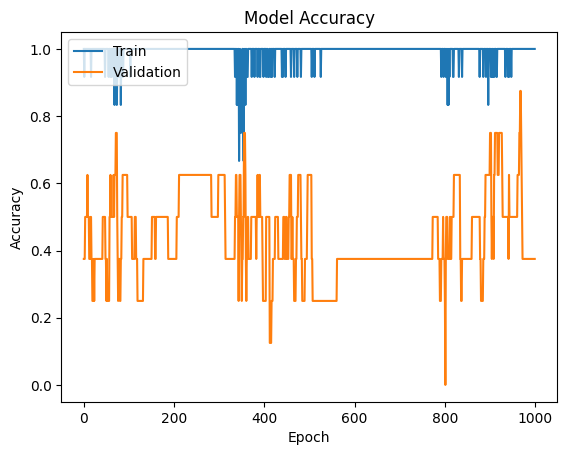

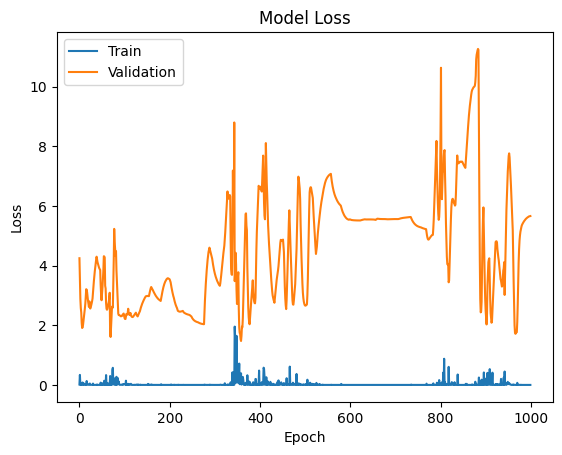

In [17]:
# Plot akurasi pelatihan dan validasi
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# plot los pelatihan dan validasi
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [18]:
model.save('/home/irium/htdocs/widiarrohman1234.github.io/Artificial_Intelligence/program_application/UAS_AI_S2_Prof_Ali_Barakbah_Class_Animal/model_e1000.h5')

In [19]:
# Load model yang sudah dilatih
model_latih = model
# model_latih = tf.keras.models.load_model('/home/widi/htdocs/Artificial_Intelligence/1.Supervised/9.TugasAkhirKlasifikasi/model_gunting_batu_kertas_fix.h5')  # Ganti dengan nama file model Anda
class_names = ['bird', 'butterfly', 'elephant','swan','tiger'] # Ganti dengan nama kelas sebenarnya

# Fungsi untuk melakukan prediksi
def predict_image(img_path):
  # Load gambar dan ubah ukurannya sesuai dengan input model
  img = image.load_img(img_path, target_size=(150, 150))
  # Ubah gambar menjadi array NumPy
  img_array  = image.img_to_array(img)
  # Tambahkan dimensi untuk batch
  img_array  = np.expand_dims(img_array , axis=0)
  # Normalisasi gambar (opsional, tergantung preprocessing saat pelatihan)
  img_array  /= 255.0

  # Melakukan prediksi
  predictions = model.predict(img_array)
  predicted_class = np.argmax(predictions[0])  # Mengambil kelas dengan probabilitas tertinggi
  confidence = predictions[0][predicted_class]  # Mengambil confidence dari prediksi

  # Get class names (assuming you have a list of class names)
  # class_names_rusak = ['rock', 'paper', 'scissors']
  class_names = ['bird', 'butterfly', 'elephant','swan','tiger']

  # Menampilkan hasil prediksi
  print(f'Prediksi: {class_names[predicted_class]} dengan keyakinan {confidence:.2f}')
  # Menampilkan gambar
  img = image.load_img(img_path, target_size=(150, 150))
  plt.imshow(img)
  plt.title(f'Prediksi: {class_names[predicted_class]}')
  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediksi: swan dengan keyakinan 1.00


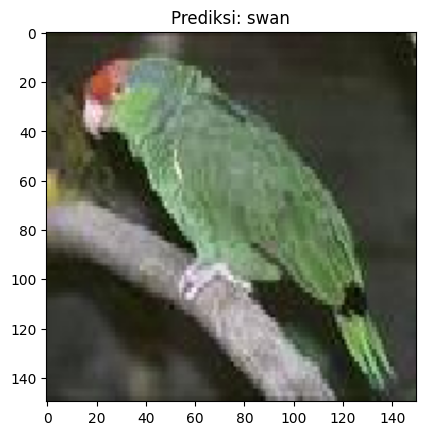

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Prediksi: butterfly dengan keyakinan 1.00


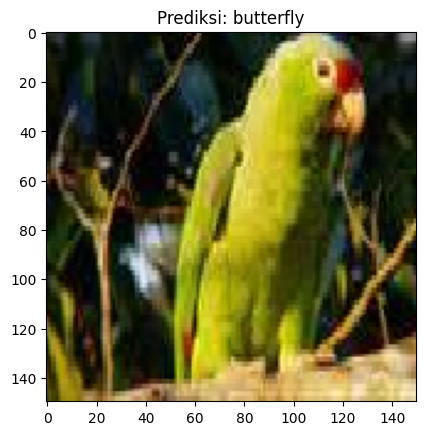

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediksi: swan dengan keyakinan 1.00


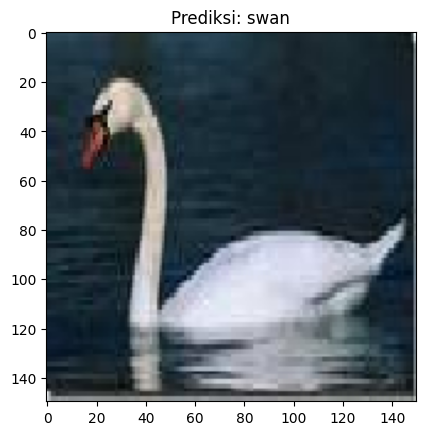

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediksi: butterfly dengan keyakinan 1.00


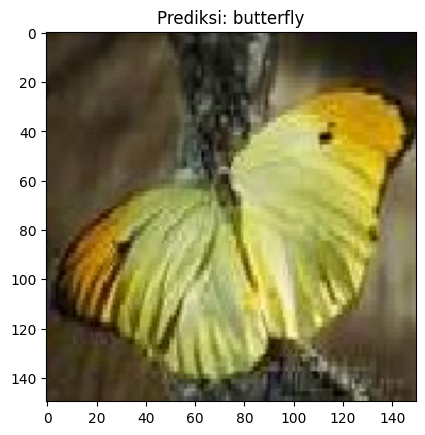

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediksi: tiger dengan keyakinan 0.95


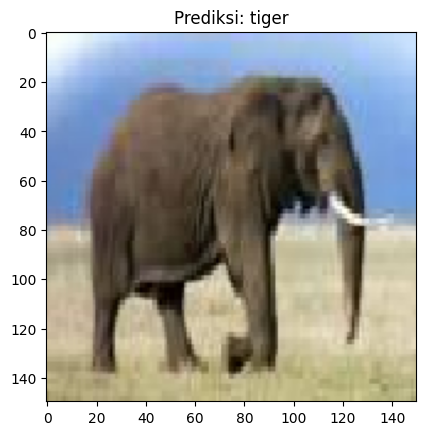

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Prediksi: elephant dengan keyakinan 1.00


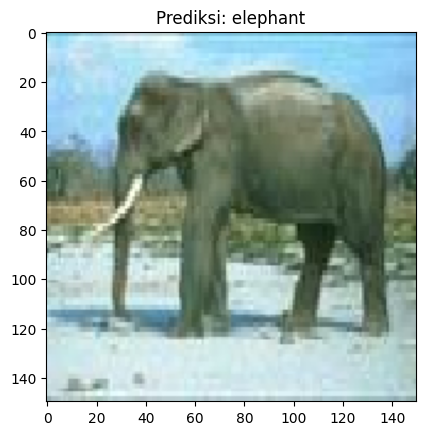

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Prediksi: swan dengan keyakinan 1.00


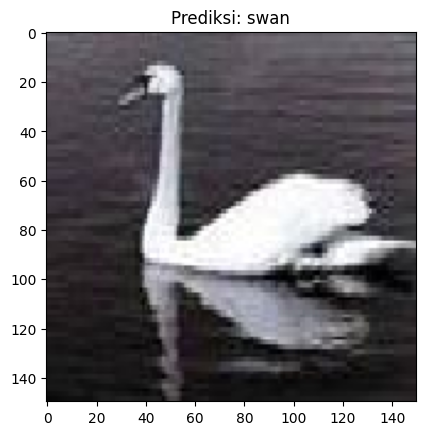

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Prediksi: tiger dengan keyakinan 1.00


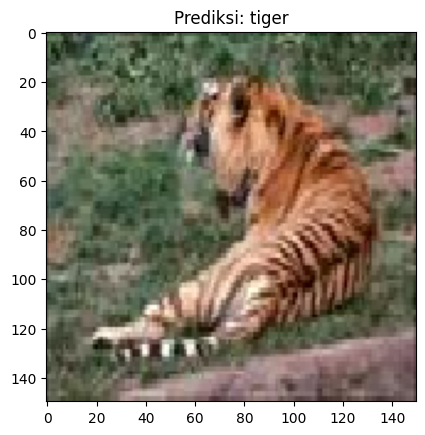

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediksi: butterfly dengan keyakinan 1.00


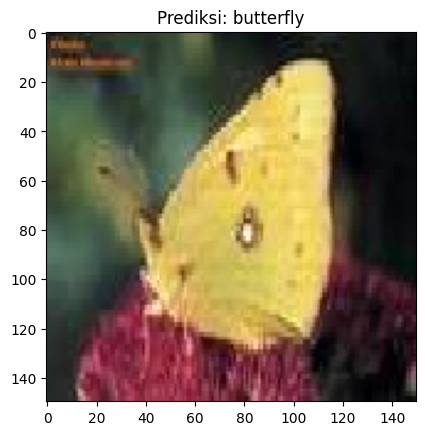

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediksi: elephant dengan keyakinan 0.71


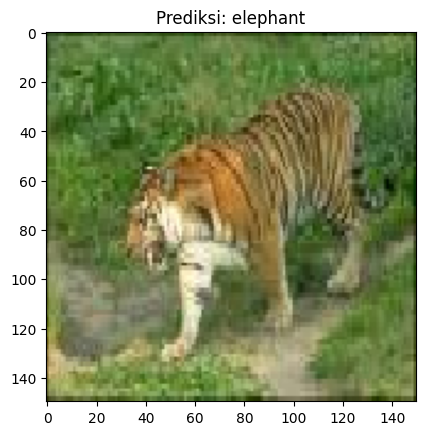

In [21]:
test_images_dir = '/home/irium/htdocs/widiarrohman1234.github.io/Artificial_Intelligence/folder_dataset/animal/animal_dataset/test/'

# Loop through all files in the test directory
for filename in os.listdir(test_images_dir):
    # Make sure the file is an image (check for .jpg, .jpeg, .png, etc.)
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(test_images_dir, filename)
        predict_image(img_path)  # Call the prediction function

# Identitas Penulis
Nama: Widi Arrohman
Email: widiarrohman1234@gmail.com